In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import quantstats as qs

In [5]:
# Get all the tickers of S&P 100 from Wikipedia

url = 'https://en.wikipedia.org/wiki/S%26P_100'
response = requests.get(url)

if response.status_code == 200:
    parsed_data = BeautifulSoup(response.content, 'html.parser')
    
    table = parsed_data.find('table', {'id': 'constituents'})
    
    if table:
        snp100 = [row.find_all('td')[0].get_text(strip=True) for row in table.find_all('tr') if row.find_all('td')]
    else:
        print("Table not found.")
else:
    print(f"Failed to fetch. Status code: {response.status_code}")

snp100


['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [6]:
# Correcting ticker name for Berkshire Hathaway

i = snp100.index('BRK.B')
snp100[i] = 'BRK-B'
snp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [7]:
# Function for preprocessing data of a single ticker to desired format of Zipline

def preprocess(data):
    data.reset_index(inplace=True)
    data.drop(columns=['Adj Close'], inplace=True)
    data.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', }, inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['volume'] = data['volume'].astype('float64')
    data.sort_values(by='timestamp', inplace=True)
    data.reset_index(drop=True, inplace=True)

    return data

In [55]:
# Fetching historical data for each ticker in S&P100

start_date = '2020-01-01'
end_date = '2022-12-31'

snp100_data_dict = {}

for ticker in snp100:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    preprocess(data).to_csv(f'CSVs/SNP100/daily/{ticker}.csv', index=False)
    snp100_data_dict[ticker] = data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Register and Ingest S&P100 Bundle

In [56]:
!zipline bundles

csvdir <no ingestions>
nvda 2023-12-07 17:11:09.128179
quandl <no ingestions>
quantopian-quandl <no ingestions>
sgx_oil <no ingestions>
snp100 <no ingestions>


In [57]:
!zipline ingest -b snp100

[2024-01-18T11:42:45+0600-INFO][zipline.data.bundles.core]
 Ingesting snp100
Loading custom pricing data:   [####################################]  100%
Merging daily equity files:  [####################################]     
[2024-01-18T11:42:46+0600-INFO][root]
 creating /home/luqisha/.zipline/data/snp100/2024-01-18T05;42;44.799529/minute_equities.bcolz
[2024-01-18T11:42:46+0600-INFO][root]
 copying /tmp/tmp8nr7vw5d/snp100/2024-01-18T05;42;44.799529/minute_equities.bcolz/metadata.json -> /home/luqisha/.zipline/data/snp100/2024-01-18T05;42;44.799529/minute_equities.bcolz
[2024-01-18T11:42:46+0600-INFO][root]
 copying /tmp/tmp8nr7vw5d/snp100/2024-01-18T05;42;44.799529/assets-7.sqlite -> /home/luqisha/.zipline/data/snp100/2024-01-18T05;42;44.799529
[2024-01-18T11:42:46+0600-INFO][root]
 copying /tmp/tmp8nr7vw5d/snp100/2024-01-18T05;42;44.799529/adjustments.sqlite -> /home/luqisha/.zipline/data/snp100/2024-01-18T05;42;44.799529
[2024-01-18T11:42:46+0600-INFO][root]
 creating /home/luqish

In [ ]:
!zipline bundles

## Backtest with Keltner

In [67]:
from strategy.keltner import keltner
from strategy.MACD import macd_signals
from zipline.api import (order, order_target, record, symbol, get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm

In [59]:
# Function to get dataframe of a specific ticker
def asset_df(symbol):
    df = pd.read_csv('CSVs/SNP100/daily/' + str(symbol) + '.csv')
    return df.set_index(pd.DatetimeIndex(df.timestamp))

In [85]:
%%capture kltr

capital_base = 10000
benchmark_ticker = 'AAPL'
window = 20

def initialize(context):
    context.i = 0
    context.keltner_sigs = {}
    context.macd_sigs = {}

    set_benchmark(symbol(benchmark_ticker))

    assets = list()
    for ticker in snp100:
        assets.append(symbol(ticker))
    context.assets = assets
    
    # Genrating signals for each asset
    for asset in context.assets:
        df = asset_df(asset.symbol)

        signals, mid, upper, lower = keltner(df, span=window, strategy=1, TimeperiodLong =80, TimeperiodShort =5, AdaWin =4)
        context.keltner_sigs[asset.symbol] = signals 

        context.macd_sigs[asset.symbol] = macd_signals(df, 12, 26, 9)

    
def handle_data(context, data):
    context.i += 1
    if context.i < window + 1:
        return

    current_date = data.history(context.assets[0], 'price', bar_count=2, frequency="1d").index[-1]
    for asset in context.assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            cash = context.portfolio.cash
            price = data.current(asset, "price")


            if context.keltner_sigs[asset.symbol][current_date] == 1: # Upward Trend by Keltner
                order_target(asset, cash//price, stop_price=(price*0.90)) # Stop loss at 10%
            elif context.keltner_sigs[asset.symbol][current_date] == -1: # Downward Trend indicated by Keltner
                if context.macd_sigs[asset.symbol][current_date] == -1: # MACD gives sell signal
                    order_target(asset, 0) # Sell all shares of the asset
            else:
                pass
    

result = run_algorithm(start=pd.to_datetime(start_date),
                        end=pd.to_datetime(end_date),
                        initialize=initialize,
                        handle_data=handle_data,
                        capital_base=capital_base,
                        bundle='snp100',
                        data_frequency='daily',
                        )

The strategy is an ensemble of Keltner and MACD indicators. It follows a trend-following approach. It buys an asset when the Keltner signal indicates an upward trend and places a stop-loss order to manage risk. It sells all units of the asset if both Keltner and MACD signals indicate a downward trend.

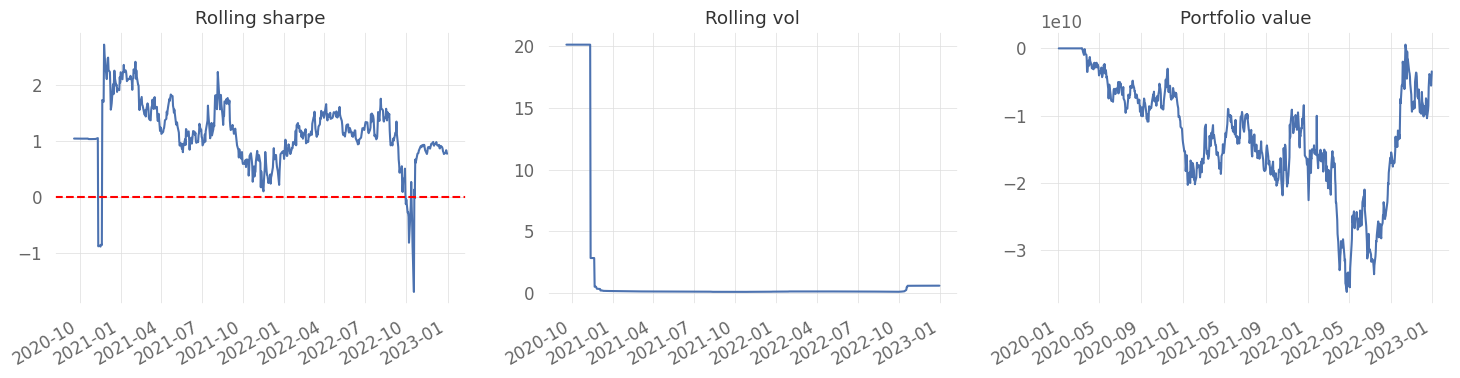

In [86]:
%matplotlib inline

import modules.stats_main as stat
result = stat.show_rolling_stats(result, 180)

The rolling sharpe plot indicates a positive sharpe as most of the value hovers on the positive side. The final portfolio value is negative indicating a loss. 

## Tearsheet with Quantstats

In [77]:
!pip install "git+https://github.com/anchorblock/quantstats.git"

  Cloning https://github.com/anchorblock/quantstats.git to /tmp/pip-req-build-6zo3wn7c
  Running command git clone --filter=blob:none --quiet https://github.com/anchorblock/quantstats.git /tmp/pip-req-build-6zo3wn7c
  Resolved https://github.com/anchorblock/quantstats.git to commit 3d4077a9f78b09ce5145707b705a2369d1b0a49b
  Preparing metadata (setup.py) ... done


/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return red

                           Strategy
-------------------------  ---------------
Start Period               2020-01-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          -34,369,801.92%
CAGR﹪                     1789.78%

Sharpe                     0.52
Prob. Sharpe Ratio         94.59%
Smart Sharpe               0.52
Sortino                    3.76
Smart Sortino              3.75
Sortino/√2                 2.66
Smart Sortino/√2           2.65
Omega                      4.04

Max Drawdown               -160288.65%
Longest DD Days            947
Volatility (ann.)          15590.09%
Calmar                     0.01
Skew                       26.58
Kurtosis                   725.3

Expected Daily %           -
Expected Monthly %         -
Expected Yearly %          -
Kelly Criterion            38.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1582.93%
Expected Shortfall (cVaR)  -1582.93%

Max Cons

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-03-11,2022-04-25,2022-10-13,947,-160288.652570,-148622.628224
2,2020-02-13,2020-02-28,2020-03-06,23,-3212.789425,-3054.611983
3,2022-10-17,2022-12-16,2022-12-30,75,-1971.928497,-1924.338036
4,2020-02-07,2020-02-07,2020-02-10,4,-10.877255,-1.916588
5,2020-02-03,2020-02-03,2020-02-03,1,-3.392116,NaN


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


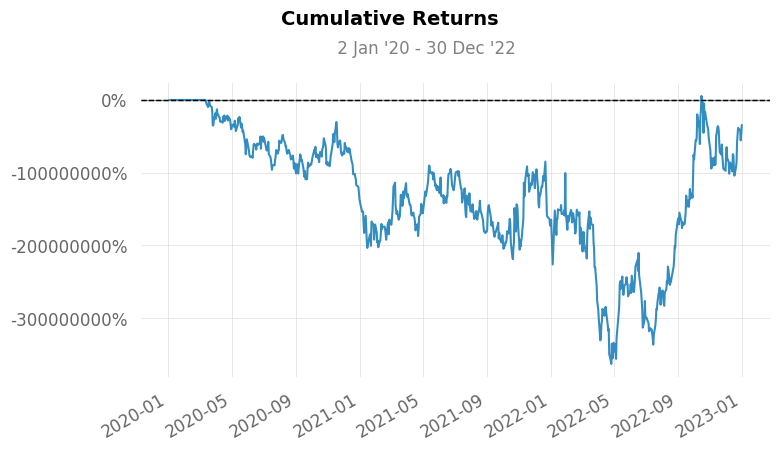

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


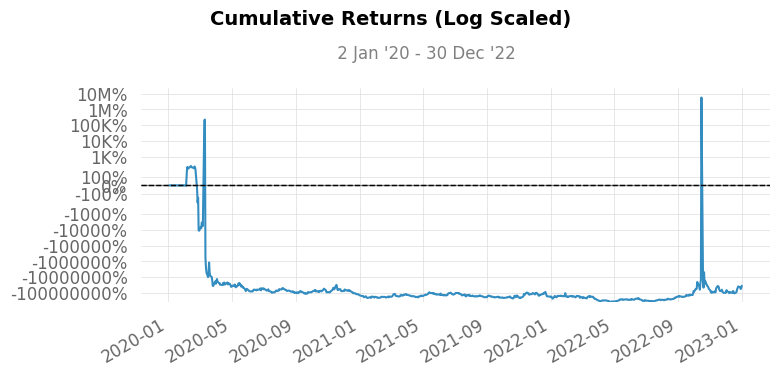

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


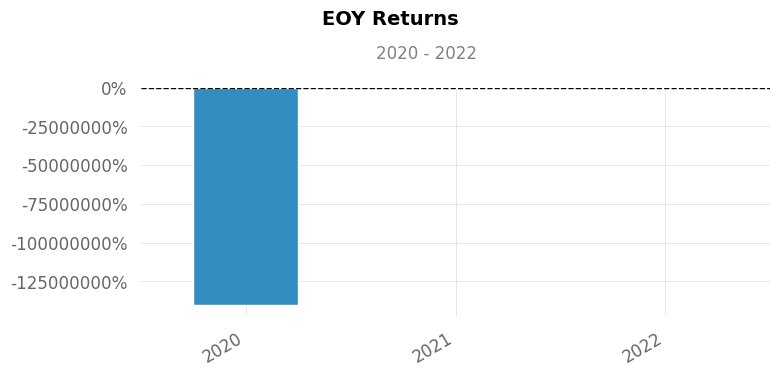

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


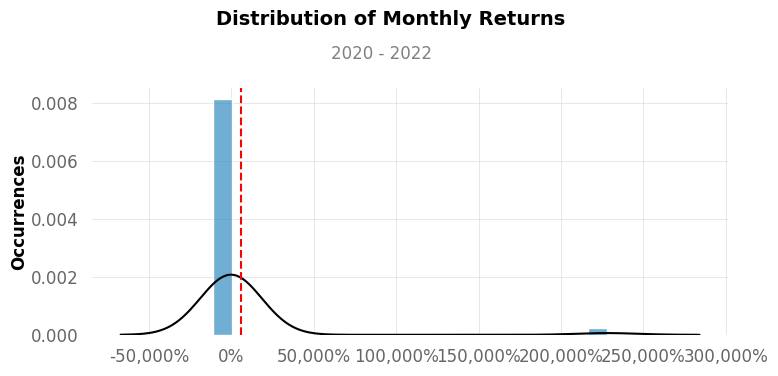

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


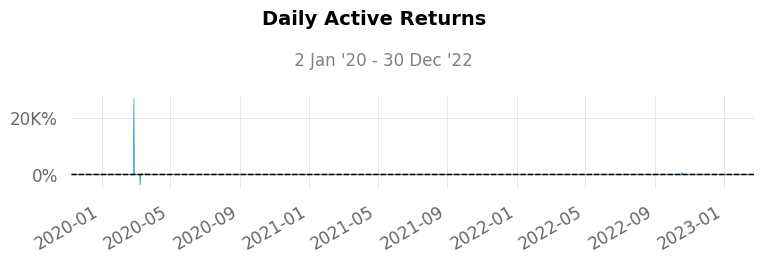

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


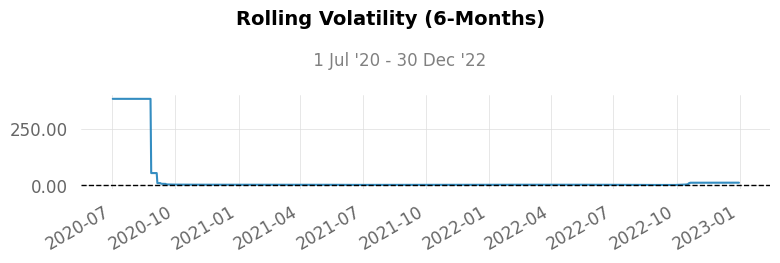

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


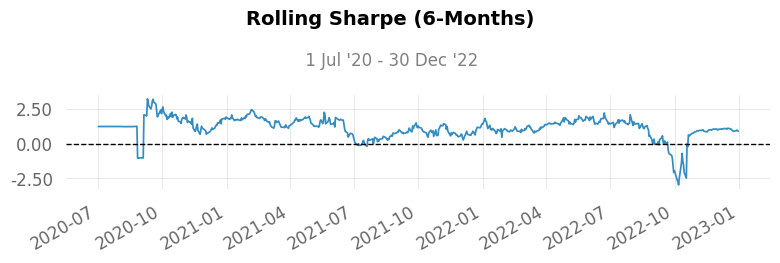

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


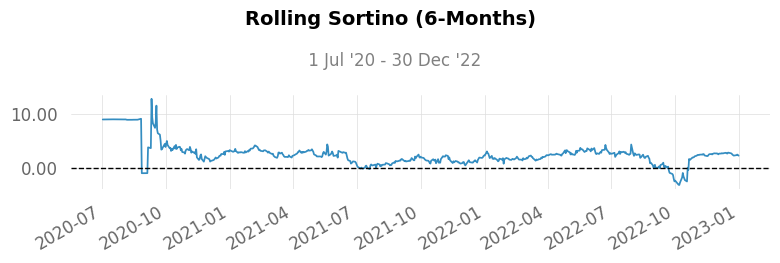

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


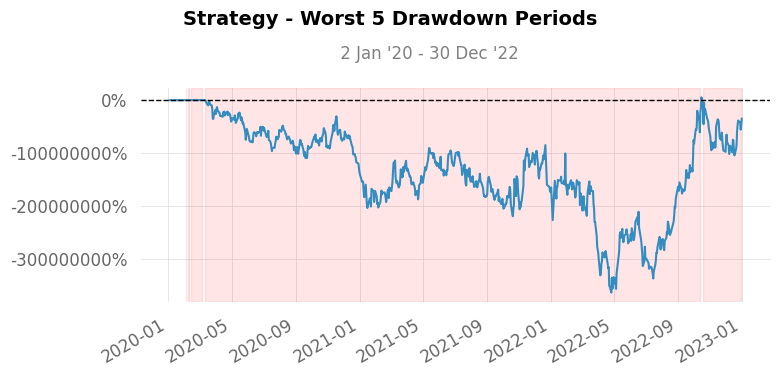

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


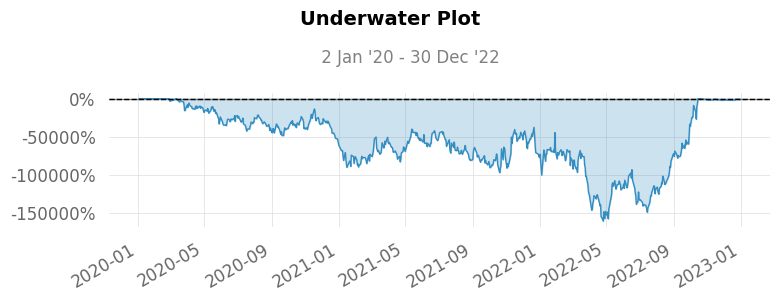

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


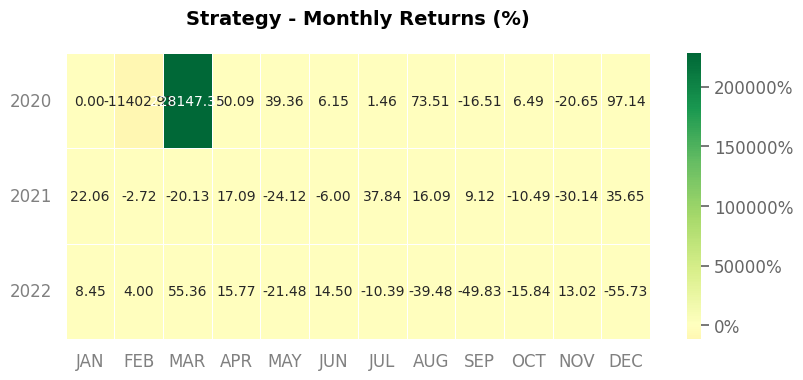

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


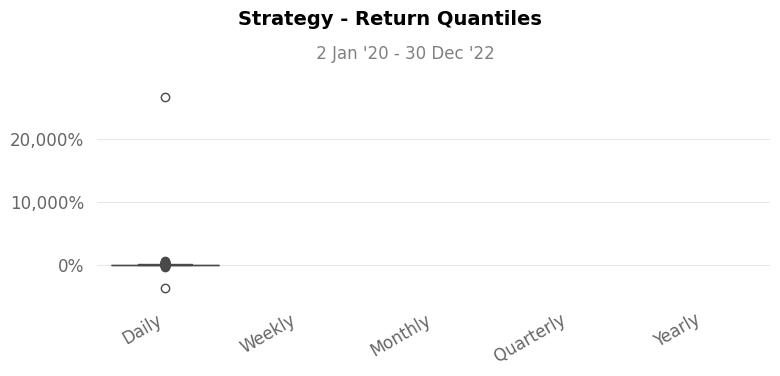

In [87]:
%matplotlib inline
import quantstats as qs

qs.reports.full(result.returns)


How to make the strategy better?

- Running an optimization algorithm on the Indicator parameters, we can find the best window size and stop-loss level that will essentially result in good returns.
- Instead of static position size when putting orders, we can decide the lot size on volatility of a stock.
- Price of an often varies depending on certain events. If we could incorporate contexts behind the changes in historical prices, by training natural language based models we can generate more accurate trade signals.